데이터 가져오기

In [136]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [137]:
fetch_housing_data()

In [138]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [139]:
data = load_housing_data()
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [141]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

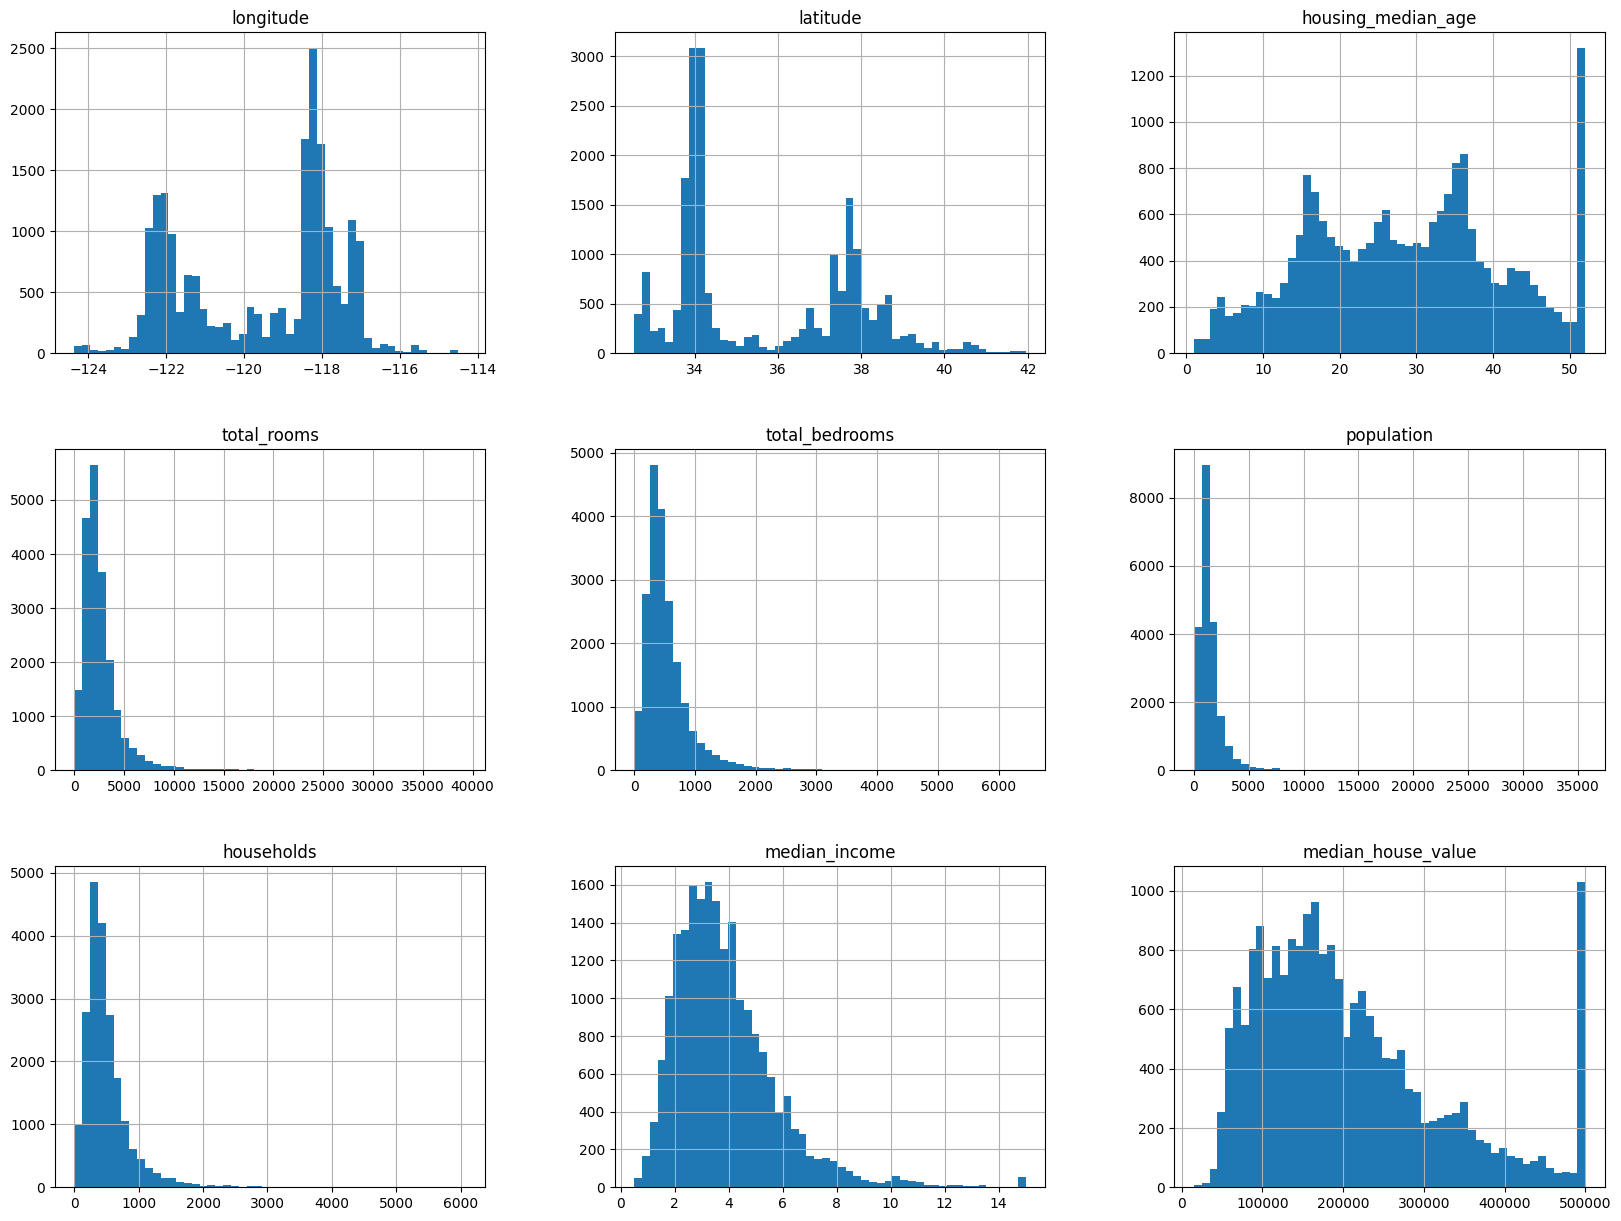

In [142]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [143]:
# 테스트셋 만들기 1
import numpy as np

def split_train_test(data, test_ratio) :
    shuffled_indices = np.random.permutation(len(data))  # 난수 발생기 초깃값 지정
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size :]
    return data.iloc[train_indices], data.iloc[test_indices]

In [144]:
train_set, test_set = split_train_test(data, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [145]:
# 테스트셋 만들기 2
from zlib import crc32
import numpy as np

def test_set_check(identifier, test_ratio) :
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column) :
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [146]:
housing_with_id = data.reset_index() # index 열이 추가된 데이터프레임 반환
print(housing_with_id.head())

   index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
2        NEAR BAY  
3        NEAR BAY  
4        NEAR BAY  


In [147]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [148]:
# 테스트셋 만들기 3 (2의 함수, housing_with_id 사용)
housing_with_id['id'] = data['longitude'] * 1000 + data['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [149]:
housing_with_id['id']

0       -122192.12
1       -122182.14
2       -122202.15
3       -122212.15
4       -122212.15
           ...    
20635   -121050.52
20636   -121170.51
20637   -121180.57
20638   -121280.57
20639   -121200.63
Name: id, Length: 20640, dtype: float64

In [150]:
# 테스트셋 만들기 4
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [151]:
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


<Axes: >

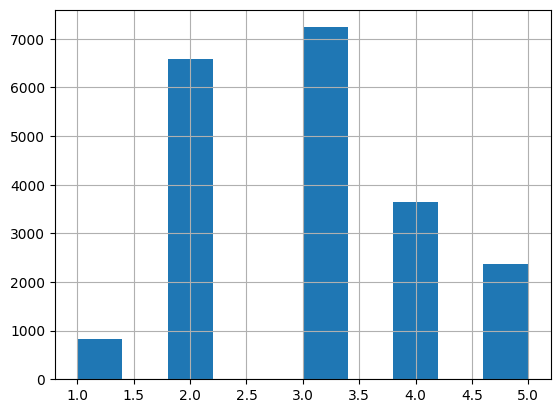

In [152]:
# 계층적 샘플링 : 모집단 여러개 층 구분 후, 각 층에서 n개씩 랜덤 추출
data['income_cat'] = pd.cut(data['median_income'], 
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf], # median_income의 범위를 나눠 income_cat 범주를 만듬
                           labels = [1, 2, 3, 4, 5])
data['income_cat'].hist()

In [153]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data['income_cat']) :   # split() : 훈련, 테스트셋으로 분할하기 위한 인덱스 생성
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [154]:
## ** n_splits를 이해하기 위한 !
# StratifiedShuffleSplit : test셋의 인덱스 중복 가능
# StratifiedKFold : test셋의 인덱스 중복 불가능

split = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data['income_cat']) :   # split() : 훈련, 테스트셋으로 분할하기 위한 인덱스 생성
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    print(strat_train_set)
    
# n_splits는 훈련/테스트셋을 총 3번 진행, 훈련셋 인덱스가 매번 변함
# random_state는 split1을 고정

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  media

In [155]:
data['income_cat'].value_counts() / len(data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [156]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

# 무작위 샘플링보다 계층 샘플링의 테스트셋이 전체 데이터셋에 있는 소득 카테고리의 비율과 비슷

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [157]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [158]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [159]:
# 원상복구
for set_ in (strat_train_set, strat_test_set) :
    set_.drop('income_cat', axis=1, inplace=True)

데이터 이해를 위한 탐색과 시각화

In [160]:
# 복사본
df = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

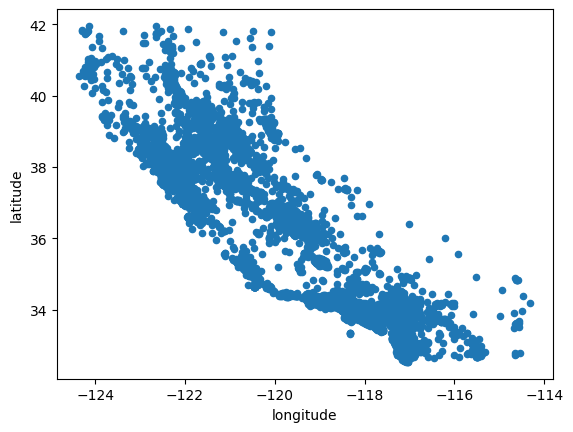

In [161]:
# 지리적 데이터 시각화
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

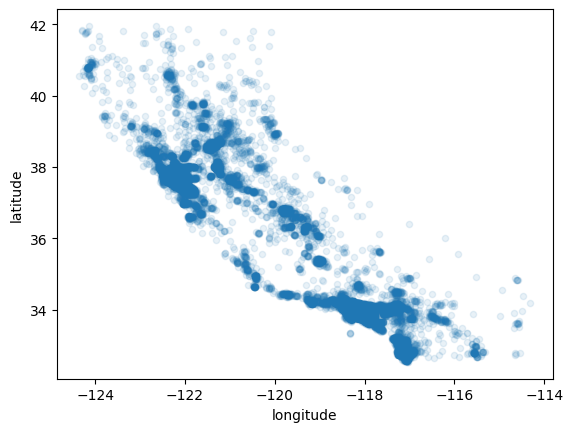

In [162]:
# 데이터 포인트가 밀집된 영역을 보여줌
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

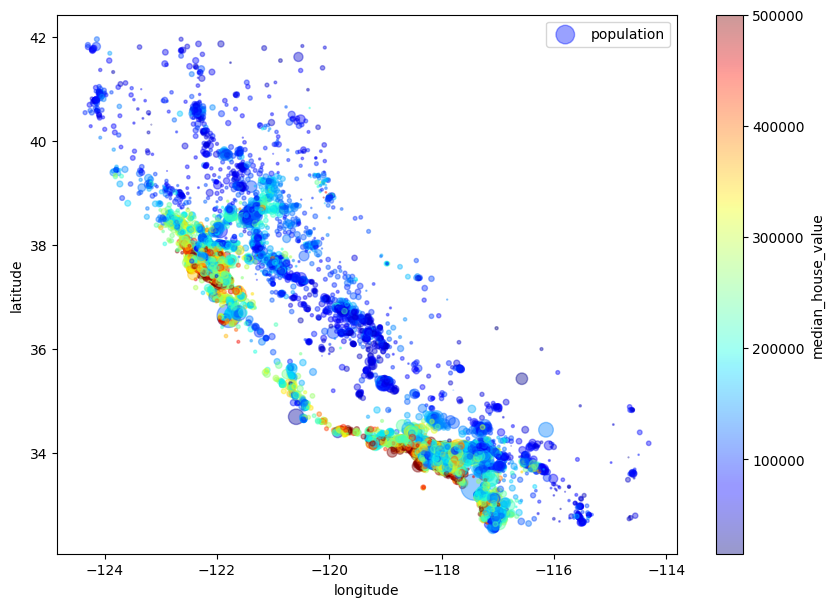

In [163]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
       s = df['population']/100, label = 'population', figsize=(10,7),
       c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend()

In [164]:
# 상관관계
df1 = df.drop('ocean_proximity', axis=1)
corr = df1.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687344
total_rooms           0.132079
housing_median_age    0.107231
households            0.065071
total_bedrooms        0.047997
population           -0.024588
longitude            -0.051653
latitude             -0.138560
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

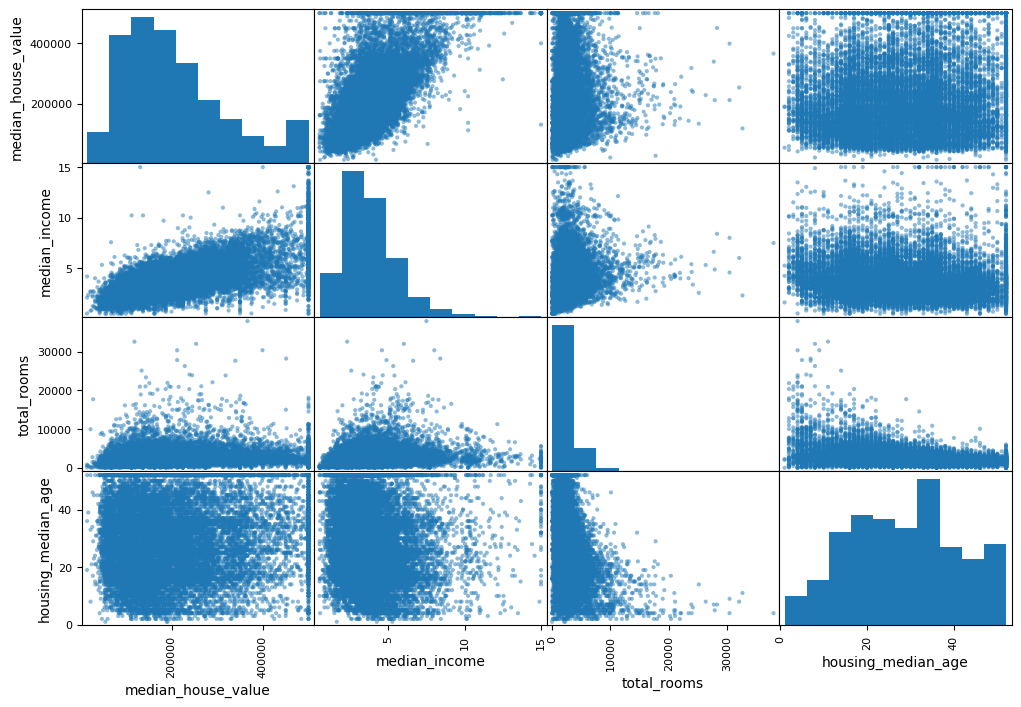

In [165]:
from pandas.plotting import scatter_matrix
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df1[cols], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

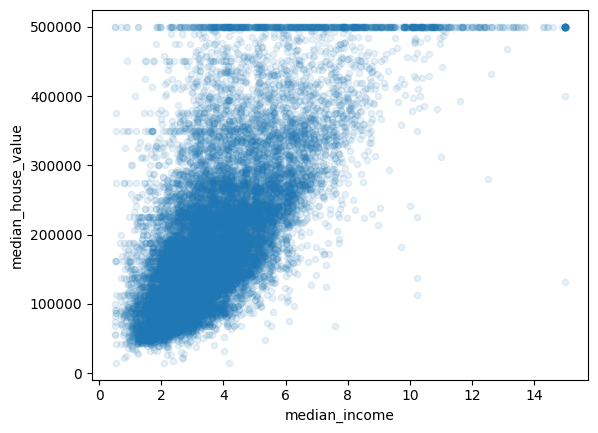

In [166]:
df1.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [167]:
# 특성 공학
df1['rooms_per_household'] = df1['total_rooms']/df1['households']
df1['bedrooms_per_room'] = df1['total_bedrooms']/df1['total_rooms']
df1['population_per_household'] = df1['population']/df1['households']

In [168]:
corr2 = df1.corr()
corr2['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687344
rooms_per_household         0.145591
total_rooms                 0.132079
housing_median_age          0.107231
households                  0.065071
total_bedrooms              0.047997
population_per_household   -0.022337
population                 -0.024588
longitude                  -0.051653
latitude                   -0.138560
bedrooms_per_room          -0.253393
Name: median_house_value, dtype: float64

머신러닝 알고리즘을 위한 데이터 준비

In [169]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [170]:
housing.shape

(16512, 9)

In [171]:
housing.dropna(subset=['total_bedrooms'])
# housing.drop('total_bedrooms', axis=1, inplace=True)
# housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)  # 원래는 median으로 저장 후 대입

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1071,-121.84,39.74,43.0,2976.0,599.0,1181.0,560.0,2.2621,INLAND
13965,-116.86,34.23,13.0,4760.0,938.0,309.0,132.0,5.4618,INLAND
14222,-117.04,32.66,22.0,3362.0,630.0,1471.0,612.0,4.1442,NEAR OCEAN
15468,-117.19,33.18,7.0,3561.0,722.0,1921.0,657.0,4.1128,<1H OCEAN
11245,-118.01,33.81,25.0,1831.0,345.0,809.0,339.0,4.5179,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16784,-122.45,37.69,17.0,2359.0,501.0,884.0,504.0,3.0625,NEAR OCEAN
14999,-117.03,32.74,35.0,1878.0,454.0,991.0,409.0,2.4345,NEAR OCEAN
14514,-117.15,32.90,12.0,1681.0,381.0,1050.0,362.0,4.2008,<1H OCEAN
5422,-118.42,34.03,44.0,629.0,131.0,326.0,156.0,4.5278,<1H OCEAN


In [172]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median') # 누락된 값 대체 / 수치형만 계산

housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)  # 모든 수치형 특성에 적용하는 것이 바람직(어떤 값이 누락될지 확신할 수 없으므로)

SimpleImputer(strategy='median')

In [173]:
imputer.statistics_  # 각 특성(열)의 중간값

array([-118.48   ,   34.25   ,   29.     , 2123.     ,  433.     ,
       1163.     ,  409.     ,    3.53175])

In [174]:
housing_num.median().values # 원본의 중간값

array([-118.48   ,   34.25   ,   29.     , 2123.     ,  433.     ,
       1163.     ,  409.     ,    3.53175])

In [175]:
X = imputer.transform(housing_num) # 넘파이 배열

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)
print(housing_tr.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1071     -121.84     39.74                43.0       2976.0           599.0   
13965    -116.86     34.23                13.0       4760.0           938.0   
14222    -117.04     32.66                22.0       3362.0           630.0   
15468    -117.19     33.18                 7.0       3561.0           722.0   
11245    -118.01     33.81                25.0       1831.0           345.0   

       population  households  median_income  
1071       1181.0       560.0         2.2621  
13965       309.0       132.0         5.4618  
14222      1471.0       612.0         4.1442  
15468      1921.0       657.0         4.1128  
11245       809.0       339.0         4.5179  


In [176]:
# 텍스트와 범주형 다루기
housing_cat = housing[['ocean_proximity']]

In [177]:
from sklearn.preprocessing import OrdinalEncoder # 텍스트->숫자
oe = OrdinalEncoder()
housing_cat_encoded = oe.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [1.],
       [4.],
       [0.],
       [0.],
       [4.],
       [0.],
       [0.],
       [0.],
       [3.]])

In [178]:
print(oe.categories_)
print(type(oe.categories_))

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
<class 'list'>


In [179]:
from sklearn.preprocessing import OneHotEncoder # 원핫인코더
ohe = OneHotEncoder()
housing_cat_1hot = ohe.fit_transform(housing_cat)
housing_cat_1hot  # 희소행렬

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [180]:
housing_cat_1hot.toarray() # 넘파이배열

# 다른 방법)ohe = OneHotEncoder(sparse=False)

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [181]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [182]:
# fit, transform을 class로 펼치는 과정
from sklearn.base import BaseEstimator, TransformerMixin  # 튜닝, 변환기

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):   # 상속받을 부모
    def __init__(self, add_bedrooms_per_room=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):  
        return self  
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [183]:
# 변환 파이프라인
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [184]:
# 하나의 변환기로 모든 열 처리
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # 수치형 열 이름
cat_attribs = ['ocean_proximity'] # 범주형 열 이름

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_full_tr = full_pipeline.fit_transform(housing)

In [185]:
# 여러 변환기를 적용하고 결과 합쳐주는
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

    
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])


from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [186]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

c:\users\knuyh\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-1.13701319,  1.92775614,  1.14580365, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.34819451, -0.65378611, -1.24448207, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25836772, -1.38936167, -0.52739635, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.20347358, -1.276917  , -1.32415826, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56969571, -0.74749001,  1.22547984, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.31326187, -1.32376895, -0.76642493, ...,  0.        ,
         0.        ,  0.        ]])

모델 선택과 훈련

In [187]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing_full_tr, housing_labels)  # input, target

LinearRegression()

In [188]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
print('예측 : ', lr.predict(some_data_prepared))
print('레이블 : ', list(some_labels))

예측 :  [102857.81563847 276280.34566767 242109.95487042 202551.32879268
 242826.76937624]
레이블 :  [85100.0, 147800.0, 303900.0, 209700.0, 177100.0]


In [189]:
from sklearn.metrics import mean_squared_error
housing_predictions = lr.predict(housing_full_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
print(rmse)

68063.00779639746


In [190]:
# rmse 줄이기 위한 (과소적합 해결) 복잡한 모델 시도
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_full_tr, housing_labels)

DecisionTreeRegressor()

In [191]:
housing_predictions1 = tree_reg.predict(housing_full_tr)
tree_mse = mean_squared_error(housing_labels, housing_predictions1)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse) # 훈련

0.0


In [192]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_full_tr, housing_labels, 
                        scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores) # 검증
# 엄청난 과대적합

[71941.13167578 71634.29899188 73124.62861387 67204.82727366
 71472.17758534 71920.79128162 69800.22921501 68959.85160785
 72622.23716762 71921.20841095]


In [193]:
lin_scores = cross_val_score(lr, housing_full_tr, housing_labels,
                            scoring = 'neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print(lin_rmse_scores) # 검증

[71434.65179439 67924.09433603 68992.31671403 66075.00269389
 65424.86056094 68711.29534168 71961.67753427 65924.20049037
 67534.98381049 69651.45483466]


In [194]:
# 결정 트리 모델이 과대적합되어 선형 회귀 모델보다 성능이 나쁘다

In [195]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(housing_full_tr, housing_labels)

RandomForestRegressor()

In [196]:
housing_predictions2 = rf.predict(housing_full_tr)
forest_mse = mean_squared_error(housing_labels, housing_predictions2)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse) # 훈련

18512.851923958075


In [197]:
forest_scores = cross_val_score(rf, housing_full_tr, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse_scores) # 검증
# 훈련셋의 점수(오류)가 낮아 다른 모델에 비해 훌륭
# 하지만, 훈련셋에 대한 점수가 검증셋에 대한 점수보다 훨씬 낮아(좋아) 훈련셋에 과대적합

[52261.93713902 48702.47179029 50832.27455676 47522.35806821
 46772.02541019 51327.2129856  47452.29512704 49824.08625149
 50002.71904227 52862.079728  ]


모델 세부 튜닝

In [198]:
# 그리드 탐색
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}
]

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv = 5,
                          scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_full_tr, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [199]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [200]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [201]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']) :
    print(np.sqrt(-mean_score), params)

64868.605478913 {'max_features': 2, 'n_estimators': 3}
55348.84787662871 {'max_features': 2, 'n_estimators': 10}
52789.09880527106 {'max_features': 2, 'n_estimators': 30}
60545.60595509379 {'max_features': 4, 'n_estimators': 3}
52503.94127171348 {'max_features': 4, 'n_estimators': 10}
50078.91143346395 {'max_features': 4, 'n_estimators': 30}
58589.11398703462 {'max_features': 6, 'n_estimators': 3}
52195.54665538055 {'max_features': 6, 'n_estimators': 10}
49686.71949477626 {'max_features': 6, 'n_estimators': 30}
58542.937678752336 {'max_features': 8, 'n_estimators': 3}
51600.83094364229 {'max_features': 8, 'n_estimators': 10}
50033.318734315435 {'max_features': 8, 'n_estimators': 30}
61758.42364533801 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54455.46937965424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59132.972947645656 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52476.53572003525 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [202]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.205209,0.008358,0.003793,0.000394,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.155258e+09,-4.305618e+09,...,-4.207936e+09,1.637920e+08,18,-1.066687e+09,-1.096780e+09,-1.244023e+09,-1.067824e+09,-1.088529e+09,-1.112769e+09,6.665508e+07
1,0.679487,0.008282,0.009176,0.000400,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.993522e+09,-3.094706e+09,...,-3.063495e+09,5.731145e+07,11,-5.349913e+08,-6.006285e+08,-5.713033e+08,-5.709490e+08,-5.765854e+08,-5.708915e+08,2.100336e+07
2,1.987642,0.019304,0.023936,0.000631,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.826565e+09,-2.754778e+09,...,-2.786689e+09,3.630363e+07,9,-4.174381e+08,-4.339833e+08,-4.254156e+08,-4.345697e+08,-4.219066e+08,-4.266627e+08,6.713882e+06
3,0.345683,0.007741,0.003592,0.000490,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.578764e+09,-3.751784e+09,...,-3.665770e+09,7.229171e+07,16,-9.184468e+08,-9.522218e+08,-9.424901e+08,-1.031721e+09,-9.705513e+08,-9.630861e+08,3.821338e+07
4,1.134609,0.015484,0.008976,0.000629,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.829615e+09,-2.703189e+09,...,-2.756664e+09,8.822332e+07,8,-5.079059e+08,-5.389541e+08,-5.152949e+08,-5.405146e+08,-5.098885e+08,-5.225116e+08,1.427734e+07
5,3.442506,0.096820,0.024142,0.000754,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.579214e+09,-2.466204e+09,...,-2.507897e+09,6.527519e+07,3,-3.898297e+08,-3.814437e+08,-3.999236e+08,-3.790303e+08,-3.759364e+08,-3.852327e+08,8.674129e+06
6,0.492100,0.012050,0.003391,0.000798,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.468728e+09,-3.278823e+09,...,-3.432684e+09,1.700505e+08,13,-9.148370e+08,-9.123429e+08,-9.706584e+08,-9.202979e+08,-9.117698e+08,-9.259812e+08,2.254114e+07
7,1.627867,0.012799,0.008782,0.000756,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.868386e+09,-2.690854e+09,...,-2.724375e+09,1.180986e+08,6,-5.065618e+08,-5.146233e+08,-5.051563e+08,-5.162011e+08,-4.680734e+08,-5.021232e+08,1.756549e+07
8,4.888587,0.041469,0.024745,0.001721,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.484821e+09,-2.408340e+09,...,-2.468770e+09,8.109241e+07,1,-3.684786e+08,-3.791224e+08,-3.734222e+08,-3.832453e+08,-3.834812e+08,-3.775499e+08,5.820941e+06
9,0.634554,0.006779,0.003781,0.000395,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.502438e+09,-3.250969e+09,...,-3.427276e+09,1.177736e+08,12,-8.490649e+08,-8.540796e+08,-8.877352e+08,-9.100263e+08,-8.596063e+08,-8.721025e+08,2.321339e+07


In [203]:
# 랜덤 탐색
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

rf = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(rf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_full_tr, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CB2989E9A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CB5C517B80>},
                   random_state=42, scoring='neg_mean_squared_error')

In [204]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48831.02574247054 {'max_features': 7, 'n_estimators': 180}
51388.28523608133 {'max_features': 5, 'n_estimators': 15}
50261.74345123563 {'max_features': 3, 'n_estimators': 72}
50780.86576301648 {'max_features': 5, 'n_estimators': 21}
48958.23619904736 {'max_features': 7, 'n_estimators': 122}
50246.986149924625 {'max_features': 3, 'n_estimators': 75}
50187.87931922632 {'max_features': 3, 'n_estimators': 88}
49357.20728407031 {'max_features': 5, 'n_estimators': 100}
50059.25944907972 {'max_features': 3, 'n_estimators': 150}
65593.09307592061 {'max_features': 5, 'n_estimators': 2}


In [205]:
# 최상의 모델과 오차 분석
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.07544324, 0.06954681, 0.04070996, 0.0174374 , 0.01716392,
       0.01673152, 0.01552544, 0.28571775, 0.08154019, 0.11389936,
       0.07994903, 0.00918057, 0.17097505, 0.00035719, 0.00237151,
       0.00345106])

In [206]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.28571774673840106, 'median_income'),
 (0.17097505445334174, 'INLAND'),
 (0.11389935653138557, 'pop_per_hhold'),
 (0.08154018989676286, 'rooms_per_hhold'),
 (0.07994902522267129, 'bedrooms_per_room'),
 (0.07544324222628616, 'longitude'),
 (0.06954681169293626, 'latitude'),
 (0.040709959809438825, 'housing_median_age'),
 (0.017437402012865942, 'total_rooms'),
 (0.01716392315672509, 'total_bedrooms'),
 (0.016731520313199192, 'population'),
 (0.01552544181656611, 'households'),
 (0.009180570910752882, '<1H OCEAN'),
 (0.0034510598790848243, 'NEAR OCEAN'),
 (0.0023715097038768253, 'NEAR BAY'),
 (0.000357185635705309, 'ISLAND')]

In [207]:
# 테스트셋 평가
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_cat_tr = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_cat_tr)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

49838.20920300144


In [208]:
# 신뢰구간
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([47536.3550709 , 52038.34297609])

# 연습문제

In [209]:
# 1) 서포트 벡터 머신 회귀를 kerner='linear'나 'rbf' 등의 다양한 하이퍼파라미터 설정을 시도하여라
from sklearn.svm import SVR
svr = SVR()

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_full_tr, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   6.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.7s
[CV] END .............................C=100.0, kernel=linear; total time=   7.7s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  15.1s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  13.9s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  12.8s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  12.2s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  12.2s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  12.1s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  12.1s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  14.6s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  16.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  16.2s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  13.0s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  12.8s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  11.6s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  12.3s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  12.9s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  13.0s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  12.2s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  11.5s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  11.6s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  11.5s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  11.6s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  12.0s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  13.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  17.9s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [210]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

69587.62297659997

In [211]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

In [212]:
# 2) GridSearchCV를 RandomizedSearchCV로 바꾸기
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),  # 역수
        'gamma': expon(scale=1.0),    # 지수분포
    }

rnd_search = RandomizedSearchCV(svr, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_full_tr, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.4s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.5s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=  10.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  19.4s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  16.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.0s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=  14.8s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=  14.7s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=  15.8s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=  10.1s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=  10.2s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=  11.7s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=  11.3s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=   9.9s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 2.8min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 2.5min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 2.4min
[CV] END C=151136.2028

[CV] END C=60.17373642891687, gamma=1.2491263443165994, kernel=linear; total time=  13.2s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  24.7s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  27.0s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  24.5s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  24.6s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  25.4s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=  14.7s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=  14.6s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=  14.9s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=  15.0s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=  15.2s
[CV] END C=55.538389

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002CB5DAD2250>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002CB5C502280>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [213]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54535.99316871617

In [214]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [215]:
# 3) 가장 중요한 특성을 선택하는 변환기를 준비 파이프라인에 추가하기
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [216]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 7,  8,  9, 10, 12], dtype=int64)

In [217]:
np.array(attributes)[top_k_feature_indices]

array(['median_income', 'rooms_per_hhold', 'pop_per_hhold',
       'bedrooms_per_room', 'INLAND'], dtype='<U18')

In [218]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.28571774673840106, 'median_income'),
 (0.17097505445334174, 'INLAND'),
 (0.11389935653138557, 'pop_per_hhold'),
 (0.08154018989676286, 'rooms_per_hhold'),
 (0.07994902522267129, 'bedrooms_per_room')]

In [219]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [220]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [221]:
housing_prepared_top_k_features[0:3]

array([[-0.84621454, -0.04734351, -0.08581201, -0.1941554 ,  1.        ],
       [ 0.83789579, 11.90343339, -0.06558234, -0.26138308,  1.        ],
       [ 0.14439835,  0.02230126, -0.06011588, -0.41550998,  0.        ]])

In [222]:
housing_full_tr[0:3, top_k_feature_indices]

array([[-0.84621454, -0.04734351, -0.08581201, -0.1941554 ,  1.        ],
       [ 0.83789579, 11.90343339, -0.06558234, -0.26138308,  1.        ],
       [ 0.14439835,  0.02230126, -0.06011588, -0.41550998,  0.        ]])

In [223]:
# 4) 전체 데이터 준비 과정과 최종 예측을 하나의 파이프라인으로 만들어보기
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('feature_selection',
                 TopFeatureSelector(feature_importances=array([0.07544324, 0.06954681, 0.04070996, 0.0174374 , 0.01716392,
       0.01673152, 0.01552544, 0.28571775, 0.08154019, 0.11389936,
       0.07994903, 0.00918057, 0.17097505, 0.00035719, 0.00237151,
       0.00345106]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [224]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 85564.57259501 152936.99405025 236060.25531748 225700.80568365]
Labels:		 [85100.0, 147800.0, 303900.0, 209700.0]


In [225]:
# 5) GirdSearchCV를 사용해 준비 단계의 옵션을 자동으로 탐색해보기
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  14.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  15.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  16.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  15.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  17.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  14.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  14.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  15.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  17.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total t

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  19.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  19.5s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  22.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  21.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  25.4s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  20.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  27.1s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  25.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  24.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  24.4s
[CV] END feat

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  53.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  37.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  44.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  44.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=11.0min
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  50.4s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  40.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  31.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  32.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  33.0s
[CV] END feat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_inc...
       0.01673152, 0.01552544, 0.28571775, 0.08154019, 0.11389936,
       0.07994903, 0.00918057, 0.17097505, 0.00035719, 0.00237151,
       0.00345106]),
                                                           k=5)),
                                       ('svm_reg',
                                        SVR(C=157055.10989448498,
                                            gamma=0.26497040005002437))]),
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16],
                          'preparation__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [226]:
grid_search_prep.best_params_

{'feature_selection__k': 16,
 'preparation__num__imputer__strategy': 'most_frequent'}